In [ ]:
# Copyright 2026 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Intro to Gemini Agentic Vision

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/generative-ai/blob/main/gemini/code-execution/intro_agentic_vision.ipynb">
      <img width="32px" src="https://www.gstatic.com/pantheon/images/bigquery/welcome_page/colab-logo.svg" alt="Google Colaboratory logo"><br> Open in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fgenerative-ai%2Fmain%2Fgemini%2Fcode-execution%2Fintro_agentic_vision.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Open in Colab Enterprise
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/main/gemini/code-execution/intro_agentic_vision.ipynb">
      <img src="https://www.gstatic.com/images/branding/gcpiconscolors/vertexai/v1/32px.svg" alt="Vertex AI logo"><br> Open in Vertex AI Workbench
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/code-execution/intro_agentic_vision.ipynb">
      <img width="32px" src="https://raw.githubusercontent.com/primer/octicons/refs/heads/main/icons/mark-github-24.svg" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
</table>

<div style="clear: both;"></div>

<p>
<b>Share to:</b>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/code-execution/intro_agentic_vision.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/8/81/LinkedIn_icon.svg" alt="LinkedIn logo">
</a>

<a href="https://bsky.app/intent/compose?text=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/code-execution/intro_agentic_vision.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/7/7a/Bluesky_Logo.svg" alt="Bluesky logo">
</a>

<a href="https://twitter.com/intent/tweet?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/code-execution/intro_agentic_vision.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/5a/X_icon_2.svg" alt="X logo">
</a>

<a href="https://reddit.com/submit?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/code-execution/intro_agentic_vision.ipynb" target="_blank">
  <img width="20px" src="https://redditinc.com/hubfs/Reddit%20Inc/Brand/Reddit_Logo.png" alt="Reddit logo">
</a>

<a href="https://www.facebook.com/sharer/sharer.php?u=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/code-execution/intro_agentic_vision.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/51/Facebook_f_logo_%282019%29.svg" alt="Facebook logo">
</a>
</p>

| Author |
| --- |
| [Eric Dong](https://github.com/gericdong) |

## Overview

Gemini's [code execution](https://docs.cloud.google.com/vertex-ai/generative-ai/docs/multimodal/code-execution) tool allows the model to generate and run Python code, enabling applications that benefit from code-based reasoning.

This capability unlocks **Agentic Vision** in models like **Gemini 3 Flash**. By enabling code execution, the model acts as an agent: instead of just analyzing a static image, it can write code to actively manipulate, crop, and inspect the image to find details that might otherwise be missed.

This feature is useful for building applications such as:

- **Zoom and Inspect:** Implicitly detecting when an object is too small and cropping the image to "zoom in" for a better look.
- **Visual Math and Plotting:** Performing precise multi-step calculations or re-plotting data accurately.
- **Image Annotation:** Identifying and bounding objects programmatically.

## Getting Started

### Install Google Gen AI SDK for Python


In [ ]:
%pip install --upgrade --quiet google-genai

### Import libraries


In [2]:
import io
import os
import sys

import requests
from IPython.display import display
from PIL import Image
from google import genai
from google.genai import types

### Authenticate your notebook environment

If you are running this notebook on Google Colab, run the cell below to authenticate your environment.

In [3]:
if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()

### Authenticate your Google Cloud Project for Vertex AI

You can use a Google Cloud Project or an API Key for authentication. This tutorial uses a Google Cloud Project.

- [Enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com)

In [4]:
# fmt: off
PROJECT_ID = "[your-project-id]"  # @param {type: "string", placeholder: "[your-project-id]", isTemplate: true}
# fmt: on
if not PROJECT_ID or PROJECT_ID == "[your-project-id]":
    PROJECT_ID = str(os.environ.get("GOOGLE_CLOUD_PROJECT"))

LOCATION = "global"

client = genai.Client(vertexai=True, project=PROJECT_ID, location=LOCATION)

### Choose a Gemini model

Use `gemini-3-flash-preview` in this tutorial. Learn more about all [Gemini models on Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/learn/models#gemini-models).

In [5]:
# fmt: off
MODEL_ID = "gemini-3-flash-preview"  # @param ["gemini-3-flash-preview"] {type: "string"}
# fmt: on

## Example: **Zoom and Inspect**

In this example, when asked to count details that are small or hard to see (like expression pedals on an organ), the model recognizes that it cannot answer accurately from the full-resolution image.

Instead of guessing, it:
1.  **Reasons** that it needs a closer look.
2.  **Writes Python code** to crop the specific area of interest.
3.  **Executes the code** to generate a new, "zoomed-in" image.
4.  **Inspects** the new image to provide an accurate answer.

**Example:**
- **Prompt**: Locate the ESMT chip. What are the numbers on the chip?
- **Image**: [https://storage.googleapis.com/cloud-samples-data/generative-ai/image/chips.jpeg](https://storage.googleapis.com/cloud-samples-data/generative-ai/image/chips.jpeg)



--- Generated Code ---
import PIL.Image
import PIL.ImageDraw

# Load the image to get dimensions
img = PIL.Image.open('input_file_0.jpeg')
width, height = img.size

# Define the ESMT chip location based on visual inspection
# It's roughly in the region [270, 160, 415, 310] in normalized coordinates
esmt_chip_box = [272, 165, 413, 313] # [ymin, xmin, ymax, xmax]

# Convert normalized to pixel coordinates
def norm_to_pixel(norm_box, w, h):
    ymin, xmin, ymax, xmax = norm_box
    return [int(ymin * h / 1000), int(xmin * w / 1000), int(ymax * h / 1000), int(xmax * w / 1000)]

esmt_pixel_box = norm_to_pixel(esmt_chip_box, width, height)

# Crop and save the image
esmt_crop = img.crop((esmt_pixel_box[1], esmt_pixel_box[0], esmt_pixel_box[3], esmt_pixel_box[2]))
esmt_crop.save('esmt_chip_zoom.png')

# Display the cropped image
# Also, look for other markings.
# Markings:
# ESMT
# M12L64164A
# SZB1C3DC9
# 7T  0325 (maybe?)
print(f'ESMT chip crop saved. Size: {esmt_crop.size}')
# [{box_2d: [

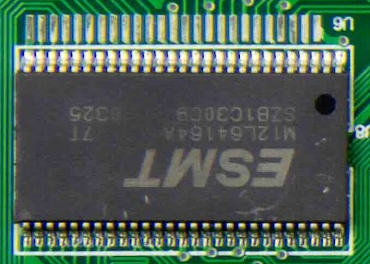

The ESMT chip, located on the middle-left side of the circuit board, contains the following markings:

*   **ESMT** (Brand logo)
*   **M12L64164A**
*   **SZB1C3DC9**
*   **7T 0325**


In [6]:
# Download the input image
image_path = "https://storage.googleapis.com/cloud-samples-data/generative-ai/image/chips.jpeg"
image_bytes = requests.get(image_path).content
image = types.Part.from_bytes(
  data=image_bytes, mime_type="image/jpeg"
)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[image, "Locate the ESMT chip. What are the numbers on the chip?"],
    config=types.GenerateContentConfig(
        tools=[types.Tool(code_execution=types.ToolCodeExecution)]
    ),
)

# Parse the multi-part response
for part in response.candidates[0].content.parts:
    # 1. The model's reasoning text
    if part.text is not None:
        print(part.text)

    # 2. The code the model generated to solve the problem
    if part.executable_code is not None:
        print("\n--- Generated Code ---")
        print(part.executable_code.code)

    # 3. The output of the code execution
    if part.code_execution_result is not None:
        print("\n--- Execution Output ---")
        print(part.code_execution_result.output)

    # 4. Any resulting images generated by the code (e.g., crops)
    if part.as_image() is not None:
        display(Image.open(io.BytesIO(part.as_image().image_bytes)))

## Example: **Visual Math and Plotting**

While standard multimodal models can describe charts, they often struggle with precise multi-step calculations or re-plotting data accurately.

With **Agentic Vision**, the model acts as a data analyst:
1.  **Extracts Data:** It reads the raw values from the visual chart into a structured format (like a Python list or dictionary).
2.  **Computes:** It writes Python code to perform the requested math (normalization and averaging) with perfect arithmetic precision.
3.  **Visualizes:** It uses libraries like `matplotlib` to generate a completely new, accurate chart based on the calculated data.

**Example:**

- **Prompt**: Make a bar chart of per-category performance, normalize prior SOTA as 1.0 for each task, then take average per-category. Plot using matplotlib with nice style.
- **Image**: [https://storage.googleapis.com/cloud-samples-data/generative-ai/image/benchmark.jpeg](https://storage.googleapis.com/cloud-samples-data/generative-ai/image/benchmark.jpeg)



--- Generated Code ---
import matplotlib.pyplot as plt
import numpy as np

# Data dictionary: Category -> [ (Benchmark, G3Pro, G2.5Pro, Opus4.5, GPT5.1, lower_is_better) ]
data = {
    'Visual Reasoning': [
        ('MMMU Pro', 81.0, 68.0, 72.0, 76.0, False),
        ('VLMsAreBiased', 50.6, 24.3, 32.7, 21.7, False)
    ],
    'Document': [
        ('CharXiv Reasoning', 81.4, 69.6, 67.2, 69.5, False),
        ('OmniDocBench1.5*', 0.115, 0.145, 0.120, 0.147, True)
    ],
    'Spatial': [
        ('ERQA', 70.5, 56.0, 51.3, 60.0, False),
        ('Point-Bench', 85.5, 62.7, 38.5, 41.8, False),
        ('RefSpatial', 65.5, 33.6, 19.5, 28.2, False),
        ('CV-Bench', 92.0, 85.9, 83.8, 84.6, False),
        ('MindCube', 77.7, 57.5, 58.5, 61.7, False)
    ],
    'Screen': [
        ('ScreenSpot Pro', 72.7, 11.4, 49.9, 3.5, False),
        ('Gui-World QA', 68.0, 42.8, 44.9, 38.7, False)
    ],
    'Video': [
        ('Video-MMMU', 87.6, 83.6, 84.4, 80.4, False),
        ('Video-MME', 88.4, 8

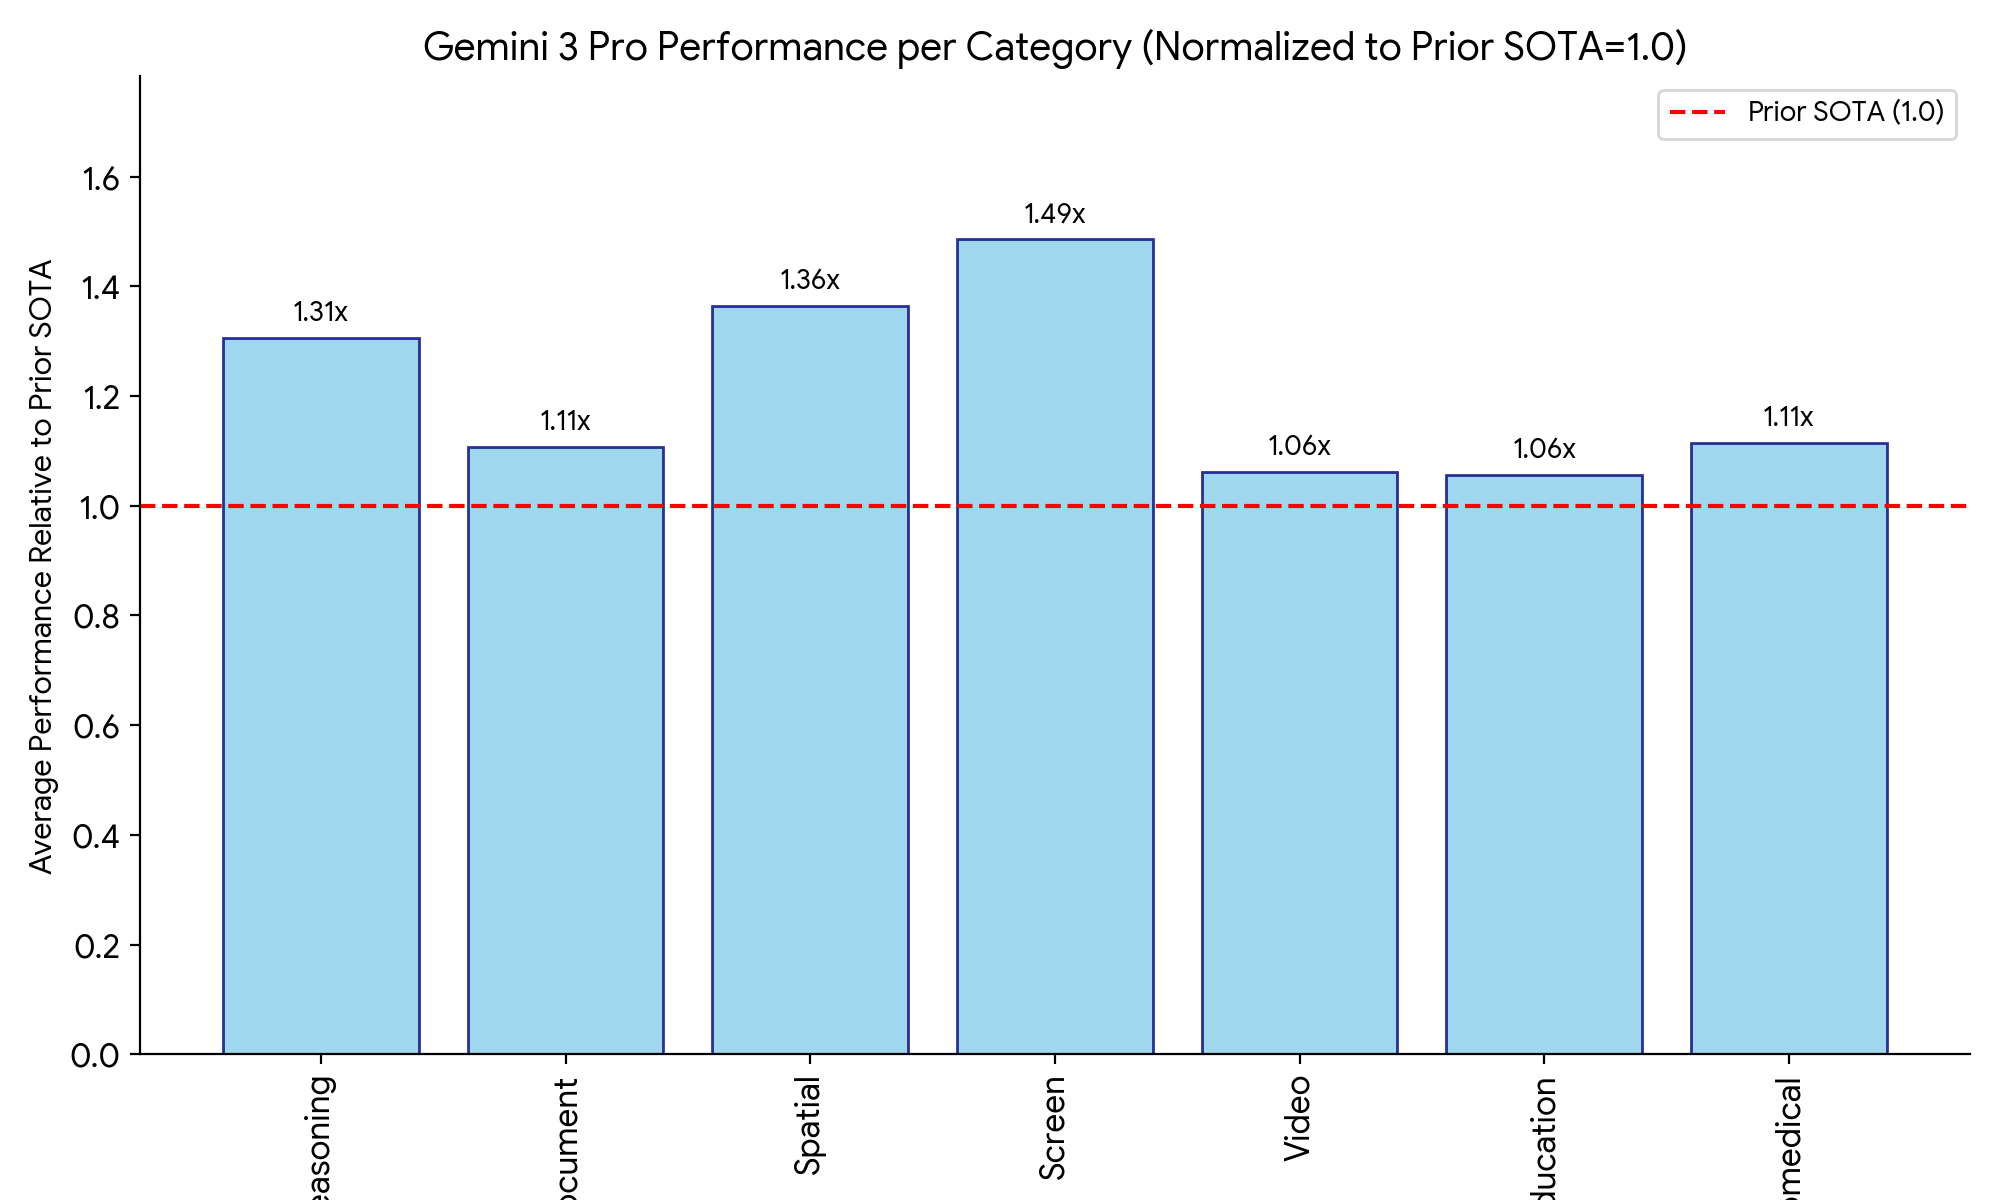

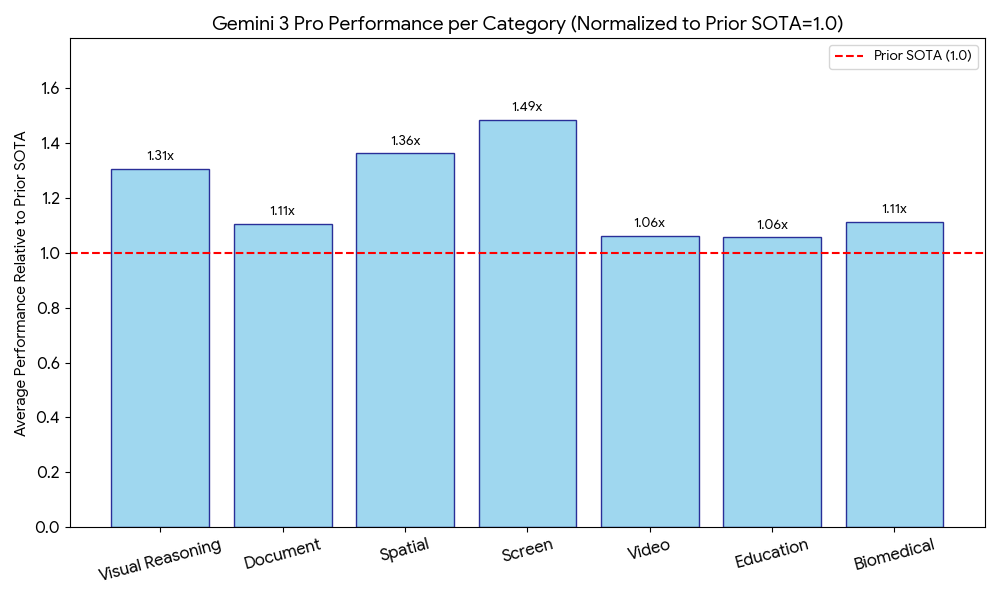

Based on the data provided in the benchmark table, I have calculated the performance of Gemini 3 Pro relative to the prior state-of-the-art (SOTA) for each task. The prior SOTA for each task was determined by taking the best performing model among Gemini 2.5 Pro, Claude Opus 4.5, and GPT-5.1. For the "OmniDocBench1.5*" benchmark, where a lower score is better, the relative performance was calculated as `Prior SOTA / Gemini 3 Pro`.

After normalizing each task's performance to 1.0 (representing the best among other models), I calculated the average for each of the 7 categories.

### Gemini 3 Pro: Per-Category Average Performance vs. Prior SOTA
- **Screen:** **1.49x** (49% improvement)
- **Spatial:** **1.36x** (36% improvement)
- **Visual Reasoning:** **1.31x** (31% improvement)
- **Biomedical:** **1.11x** (11% improvement)
- **Document:** **1.11x** (11% improvement)
- **Education:** **1.06x** (6% improvement)
- **Video:** **1.06x** (6% improvement)

The resulting bar chart below visuali

In [ ]:
# Use to the benchmark image in Cloud Storage
image = types.Part.from_uri(
    file_uri="https://storage.googleapis.com/cloud-samples-data/generative-ai/image/benchmark.jpeg",
    mime_type="image/jpeg",
)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        image,
        "Make a bar chart of per-category performance, normalize prior SOTA as 1.0 for each task, then take average per-category. Plot using matplotlib with nice style.",
    ],
    config=types.GenerateContentConfig(
        tools=[types.Tool(code_execution=types.ToolCodeExecution)]
    ),
)

# Parse the multi-part response with comments
for part in response.candidates[0].content.parts:
    # 1. The model's reasoning text (e.g., "I need to extract the data...")
    if part.text is not None:
        print(part.text)

    # 2. The executable code generated by the model
    if part.executable_code is not None:
        print("\n--- Generated Code ---")
        print(part.executable_code.code)

    # 3. The text output of the code execution
    if part.code_execution_result is not None:
        print("\n--- Execution Output ---")
        print(part.code_execution_result.output)

    # 4. Any resulting charts/images generated by the code
    if part.as_image() is not None:
        display(Image.open(io.BytesIO(part.as_image().image_bytes)))

## Example: **Image Annotation & Spatial Reasoning**

In this scenario, the model demonstrates spatial reasoning by **modifying the pixel data** directly. Instead of just describing where objects should go, it acts as an intelligent image editor.

The model:
1.  **Identifies** the objects (trash items) and targets (recycling bins) within the image.
2.  **Reasons** about the correct category for each item (e.g., paper vs. plastic).
3.  **Calculates Coordinates:** It determines the start and end points for the arrows.
4.  **Draws:** It uses the `PIL` (Python Imaging Library) to draw colored arrows on the image, creating a visual guide that solves the user's problem.

**Example:**
- **Prompt**: Annotate on the image with arrows of different colors, which object should go into which bin.
- **Image**: [https://storage.googleapis.com/cloud-samples-data/generative-ai/image/robotic.jpeg](https://storage.googleapis.com/cloud-samples-data/generative-ai/image/robotic.jpeg)



--- Generated Code ---
import PIL.Image
import PIL.ImageDraw

# Load the image to get its dimensions
img = PIL.Image.open('f_https___storage.googleapis.com_cloud_samples_data_generative_ai_image_robotic.jpeg')
width, height = img.size

# Define objects and bins with normalized coordinates (ymin, xmin, ymax, xmax)
# Bins
light_blue_bin = [120, 308, 340, 437]
green_bin = [248, 677, 459, 830]
black_bin = [645, 407, 902, 578]

# Objects to go into Green bin (Organics)
green_pepper = [255, 482, 296, 545]
red_pepper = [316, 479, 348, 543]
grapes = [582, 554, 666, 594]
cherries = [463, 670, 513, 719]

# Objects to go into Light Blue bin (Recycling)
soda_can = [395, 523, 490, 606]

# Objects to go into Black bin (Waste/Landfill)
napkin = [177, 563, 252, 609]
cup = [270, 587, 346, 642]
choc_wrapper = [395, 421, 479, 504]
fruit_snack = [519, 464, 602, 544]

def denormalize(box, width, height):
    return [box[0] * height / 1000, box[1] * width / 1000, box[2] * height / 1000, box[3] * width / 10

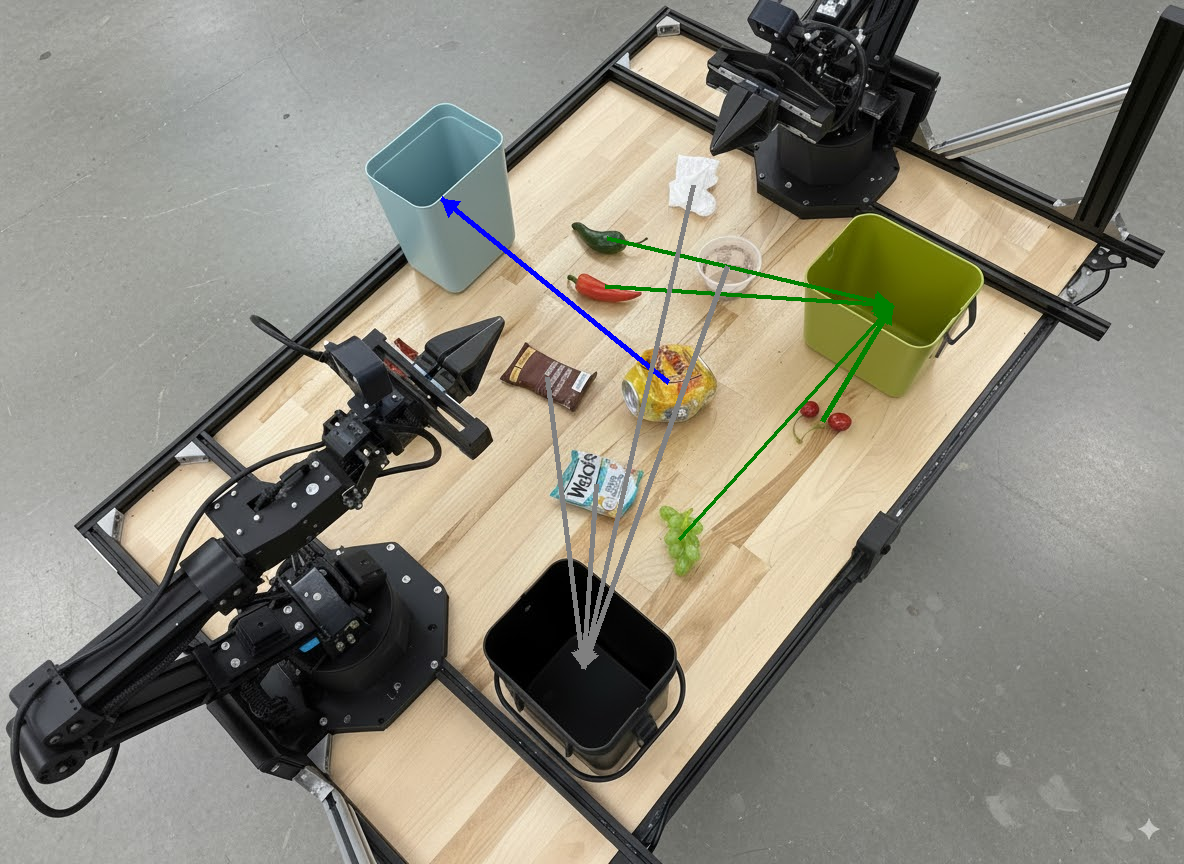


The image has been annotated with arrows showing the suggested disposal for each object:
- **Green arrows** point food items (red pepper, green pepper, grapes, and cherries) toward the **green bin**, typically used for organic waste.
- A **blue arrow** points the crushed soda can toward the **light blue bin**, generally intended for recyclables.
- **Gray arrows** point non-recyclable or soiled waste (napkin, plastic cup, chocolate wrapper, and fruit snack packet) toward the **black bin**, which is commonly for general waste.


In [ ]:
# Use the robotic arm image in Cloud Storage
image = types.Part.from_uri(
    file_uri="https://storage.googleapis.com/cloud-samples-data/generative-ai/image/robotic.jpeg",
    mime_type="image/jpeg",
)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        image,
        "Annotate on the image with arrows of different colors, which object should go into which bin.",
    ],
    config=types.GenerateContentConfig(
        tools=[types.Tool(code_execution=types.ToolCodeExecution)]
    ),
)

# Parse the multi-part response with comments
for part in response.candidates[0].content.parts:
    # 1. The model's reasoning text
    if part.text is not None:
        print(part.text)

    # 2. The executable code generated by the model
    if part.executable_code is not None:
        print("\n--- Generated Code ---")
        print(part.executable_code.code)

    # 3. The text output of the code execution
    if part.code_execution_result is not None:
        print("\n--- Execution Output ---")
        print(part.code_execution_result.output)

    # 4. The final annotated image generated by the code
    if part.as_image() is not None:
        display(Image.open(io.BytesIO(part.as_image().image_bytes)))